## Example SHAP notebook

In [1]:
import os 
os.chdir('..') #Move back to the project root directory

In [10]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from preprocessing.preprocessor import Preprocessor
from util.dataloader import DataLoader
from util.datasplitter import data_splitter
from sklearn.feature_extraction.text import TfidfVectorizer
import shap
#set seed
SEED = 42

In [5]:
#Load a model : e.g. logistic regression with tfidf for tweetEval emotion from example_notebook.ipynb
loaded_model = pickle.load(open('models/lr_tfidf_emo.sav','rb'))

In [6]:
loaded_model

LogisticRegression()

In [7]:
#Load data 
dl = DataLoader(['emotion'])
data = dl.load()['tweetEval']

In [8]:
#Initialize preprocessors
preprocessor = Preprocessor() #Preprocessor for standard text
tweet_preprocessor = Preprocessor(is_tweet=True) #Preprocessor for tweets
train, _ , test = data_splitter(data, tweet_preprocessor,create_val_set=True,seed=SEED)

In [13]:
#Prepare the data
vec = TfidfVectorizer()
y_train = train.pop('label')
y_test = test.pop('label')
X_train = vec.fit_transform(train['text'])
X_test = vec.transform(test['text'])

In [15]:
explainer = shap.LinearExplainer(loaded_model,
                                 X_train,
                                 feature_dependence="interventional") #Maybe another explainer is needed and other parameters

The option feature_dependence has been renamed to feature_perturbation!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [16]:
shap_values = explainer.shap_values(X_test)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


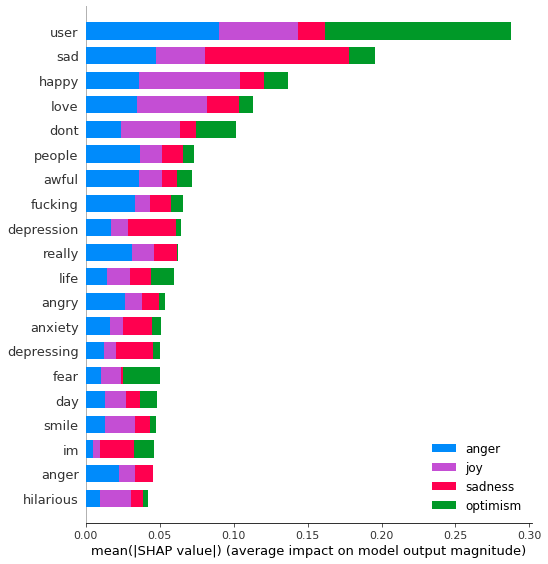

In [18]:
plt = shap.summary_plot(shap_values,
                        feature_names=vec.get_feature_names(),
                        class_names = ['anger','joy','optimism','sadness'])